In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical


In [4]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Example training images and their labels: [np.uint8(6), np.uint8(9), np.uint8(9), np.uint8(4), np.uint8(1), np.uint8(1), np.uint8(2), np.uint8(7), np.uint8(8), np.uint8(3)]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


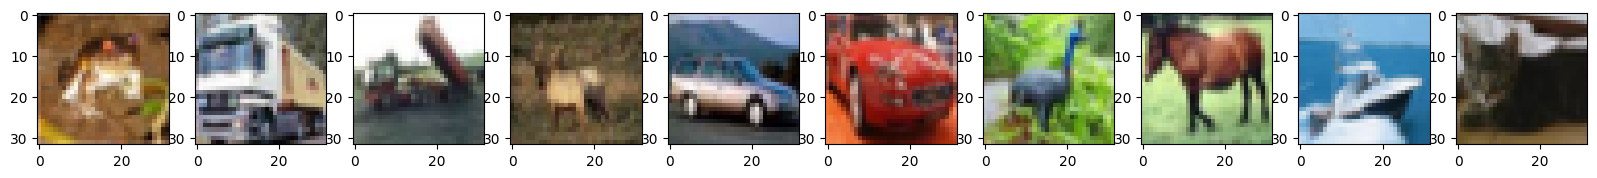

In [6]:
import matplotlib.pyplot as plt

cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()


In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [9]:
X_train = x_train / 255
X_test = x_test / 255

In [11]:
from tensorflow.keras.utils import to_categorical

num_classes = 10
Y_train = to_categorical(y_train, num_classes=num_classes)
Y_test = to_categorical(y_test, num_classes=num_classes)


In [13]:
print("Train data shapes")
print(X_train.shape)
print(Y_train.shape)
print("Test data shapes")
print(X_test.shape)
print(Y_test.shape)

Train data shapes
(50000, 32, 32, 3)
(50000, 10)
Test data shapes
(10000, 32, 32, 3)
(10000, 10)


In [14]:
model = Sequential()
# Add 2 convolutional layers
model.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(32, kernel_size = (3,3), strides=(1,1), padding='same', activation= 'relu'))
# Add maxpool layer
model.add(MaxPool2D(pool_size= (2,2)))

# Add flatten layer
model.add(Flatten())
# Add Dense layers for hidden and output

model.add(Dense(256, activation= 'relu'))
model.add(Dense(num_classes,activation= 'softmax'))

c:\Users\prash\Desktop\Image Classification by using ML\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Have a look at the summary of constructed CNN model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,110,122 (8.05 MB)

 Trainable params: 2,110,122 (8.05 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# compile the model
model.compile(loss= 'categorical_crossentropy', metrics= ['accuracy'], optimizer= 'adam')

In [17]:
# Train the CNN model
Info = model.fit(X_train, Y_train, batch_size= 128, epochs= 10, verbose=2, validation_split= 0.2)

Epoch 1/10
313/313 - 19s - 62ms/step - accuracy: 0.4582 - loss: 1.5155 - val_accuracy: 0.5706 - val_loss: 1.2359
Epoch 2/10
313/313 - 58s - 186ms/step - accuracy: 0.6111 - loss: 1.1032 - val_accuracy: 0.6221 - val_loss: 1.0942
Epoch 3/10
313/313 - 56s - 180ms/step - accuracy: 0.6697 - loss: 0.9422 - val_accuracy: 0.6592 - val_loss: 0.9915
Epoch 4/10
313/313 - 17s - 53ms/step - accuracy: 0.7083 - loss: 0.8360 - val_accuracy: 0.6764 - val_loss: 0.9499
Epoch 5/10
313/313 - 17s - 54ms/step - accuracy: 0.7445 - loss: 0.7356 - val_accuracy: 0.6861 - val_loss: 0.9225
Epoch 6/10
313/313 - 17s - 53ms/step - accuracy: 0.7726 - loss: 0.6559 - val_accuracy: 0.6826 - val_loss: 0.9494
Epoch 7/10
313/313 - 17s - 53ms/step - accuracy: 0.8067 - loss: 0.5599 - val_accuracy: 0.6793 - val_loss: 0.9795
Epoch 8/10
313/313 - 17s - 54ms/step - accuracy: 0.8389 - loss: 0.4707 - val_accuracy: 0.6862 - val_loss: 1.0121
Epoch 9/10
313/313 - 17s - 54ms/step - accuracy: 0.8688 - loss: 0.3880 - val_accuracy: 0.6840 

In [18]:
def plotLosses(Info):  
    plt.plot(Info.history['loss'])
    plt.plot(Info.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

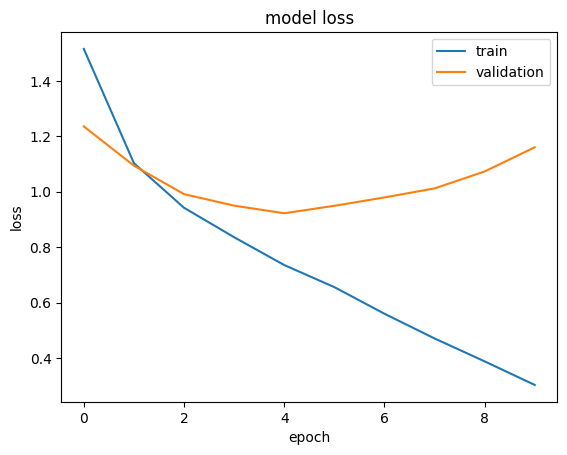

In [19]:
plotLosses(Info)

In [20]:
model= Sequential()
# Add 2 convolution layers
model.add(Conv2D(32,kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
# Add Dropaut Layer
model.add(Dropout(0.25))

# Add flatten layer
model.add(Flatten())
# Add Dense layers for hidden and output

model.add(Dense(256, activation= 'relu'))
model.add(Dense(num_classes,activation= 'softmax'))

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,110,122 (8.05 MB)

 Trainable params: 2,110,122 (8.05 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='categorical_crossentropy', metrics= ['accuracy'], optimizer= 'adam')

In [23]:
# Train the CNN model
Info = model.fit(X_train, Y_train, batch_size= 128, epochs= 10, verbose=2, validation_split= 0.2)

Epoch 1/10
313/313 - 35s - 111ms/step - accuracy: 0.4746 - loss: 1.4569 - val_accuracy: 0.5702 - val_loss: 1.2544
Epoch 2/10
313/313 - 24s - 76ms/step - accuracy: 0.6191 - loss: 1.0848 - val_accuracy: 0.6288 - val_loss: 1.0656
Epoch 3/10
313/313 - 18s - 57ms/step - accuracy: 0.6752 - loss: 0.9359 - val_accuracy: 0.6691 - val_loss: 0.9681
Epoch 4/10
313/313 - 18s - 56ms/step - accuracy: 0.7093 - loss: 0.8296 - val_accuracy: 0.6593 - val_loss: 0.9916
Epoch 5/10
313/313 - 18s - 57ms/step - accuracy: 0.7416 - loss: 0.7344 - val_accuracy: 0.6922 - val_loss: 0.9008
Epoch 6/10
313/313 - 18s - 57ms/step - accuracy: 0.7751 - loss: 0.6420 - val_accuracy: 0.6912 - val_loss: 0.9082
Epoch 7/10
313/313 - 18s - 57ms/step - accuracy: 0.8072 - loss: 0.5505 - val_accuracy: 0.6999 - val_loss: 0.9153
Epoch 8/10
313/313 - 18s - 57ms/step - accuracy: 0.8362 - loss: 0.4692 - val_accuracy: 0.7056 - val_loss: 0.9141
Epoch 9/10
313/313 - 22s - 70ms/step - accuracy: 0.8672 - loss: 0.3837 - val_accuracy: 0.6951 -

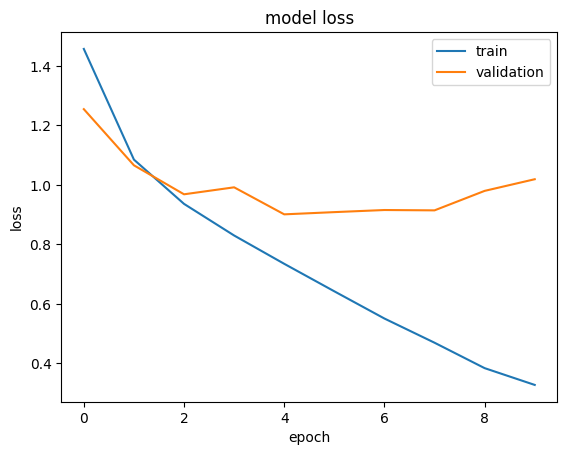

In [24]:
plotLosses(Info)

In [25]:
score = model.evaluate(X_test, Y_test, batch_size=128, verbose=0)

In [26]:
print(model.metrics_names)
print(score)

['loss', 'compile_metrics']
[1.0213879346847534, 0.6901000142097473]


In [27]:
# Save the model to a file
model.save('cifar10_model.h5')


In [28]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [29]:
import streamlit as st
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model('cifar10_model.h5')

# Class names for CIFAR-10 dataset
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Title for Streamlit app
st.title('CIFAR-10 Image Classifier')

# Upload an image
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Display the uploaded image
    img = image.load_img(uploaded_file, target_size=(32, 32))
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Preprocess the image for prediction
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Display the prediction
    st.write(f"Prediction: {cifar10_classes[predicted_class]}")
    st.write(f"Confidence: {predictions[0][predicted_class]:.2f}")


2024-11-28 23:27:45.128 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 23:27:45.454 
  command:

    streamlit run c:\Users\prash\Desktop\Image Classification by using ML\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-28 23:27:45.454 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 23:27:45.454 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 23:27:45.454 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 23:27:45.454 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 23:27:45.454 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 